In [59]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.trading_strategies.trading_strategy as tsh
import source.plot_functions.plots_trading_strategies as plot_ts
uselog= True
data = dp.prepare_data(uselog=uselog)
data = data[data.index >= '1927-01-01']

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [60]:
model_forecast = pd.read_csv('../../Data/ModelData/oos_predictions.csv', parse_dates=['date'], index_col='date')


In [61]:
df = pd.merge(data, model_forecast, left_index=True, right_index=True, how='left')

In [62]:
df.columns

Index(['price', 'd12', 'e12', 'ret', 'retx', 'AAA', 'BAA', 'lty', 'ltr',
       'corpr',
       ...
       'y_true_combination_without_1957', 'y_pred_combination_without_1957',
       'y_true_combination_without_19577', 'y_pred_combination_without_19577',
       'y_true_combination_without_1957_non_log',
       'y_pred_combination_without_1957_non_log',
       'y_true_chronos2_without_lookahead_non_log_context_length_680_fix_test_01',
       'y_pred_chronos2_without_lookahead_non_log_context_length_680_fix_test_01',
       'y_true_chronos2_without_lookahead_context_length_680_fix_test_01',
       'y_pred_chronos2_without_lookahead_context_length_680_fix_test_01'],
      dtype='object', length=133)

In [63]:
a  = df[df["y_pred_chronos2_without_lookahead_context_length_680_fix_test_01"].notna() & (df.index >= '1965-01-01')]

In [64]:
a["y_pred_chronos2_without_lookahead_context_length_680_fix_test_01"] == 0

date
1965-01-01    False
1965-02-01    False
1965-03-01    False
1965-04-01    False
1965-05-01    False
              ...  
2024-08-01    False
2024-09-01    False
2024-10-01    False
2024-11-01    False
2024-12-01    False
Name: y_pred_chronos2_without_lookahead_context_length_680_fix_test_01, Length: 720, dtype: bool

In [75]:
sum((a["y_pred_chronos2_without_lookahead_context_length_680_fix_test_01"]) )- 5.775474066613242

-5.329070518200751e-15

In [71]:
a

,price,d12,e12,ret,retx,AAA,BAA,lty,ltr,corpr,...,y_true_combination_without_1957,y_pred_combination_without_1957,y_true_combination_without_19577,y_pred_combination_without_19577,y_true_combination_without_1957_non_log,y_pred_combination_without_1957_non_log,y_true_chronos2_without_lookahead_non_log_context_length_680_fix_test_01,y_pred_chronos2_without_lookahead_non_log_context_length_680_fix_test_01,y_true_chronos2_without_lookahead_context_length_680_fix_test_01,y_pred_chronos2_without_lookahead_context_length_680_fix_test_01
date,,,,,,,,,,,,,,,,,,,,,
1965-01-01,87.56,2.516670,4.593330,0.034791,0.033837,0.0443,0.0480,0.0422,0.004000,0.008100,...,0.031403,0.005735,0.031403,0.005735,0.031991,0.006822,0.031991,0.008401,0.031403,0.008198
1965-02-01,87.43,2.533330,4.636670,0.003746,-0.000853,0.0441,0.0478,0.0424,0.001400,0.000900,...,0.000743,0.006090,0.000743,0.006090,0.000746,0.007146,0.000746,0.009668,0.000743,0.009777
1965-03-01,86.16,2.550000,4.680000,-0.012213,-0.013685,0.0442,0.0478,0.0422,0.005400,0.001200,...,-0.015882,0.005822,-0.015882,0.005822,-0.015813,0.006846,-0.015813,0.008880,-0.015882,0.009008
1965-04-01,89.11,2.570000,4.733330,0.035612,0.034769,0.0443,0.0480,0.0422,0.003600,0.002100,...,0.031897,0.005568,0.031897,0.005568,0.032512,0.006603,0.032512,0.006244,0.031897,0.006441
1965-05-01,88.42,2.590000,4.786670,-0.003122,-0.008354,0.0444,0.0481,0.0423,0.001800,-0.000800,...,-0.006222,0.006061,-0.006222,0.006061,-0.006222,0.007089,-0.006222,0.013783,-0.006222,0.013719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,5648.40,72.925466,198.823333,0.024283,0.022898,0.0487,0.0560,0.0387,0.012792,0.015726,...,0.019204,0.004909,0.019204,0.004909,0.019483,0.005882,0.019483,0.005968,0.019204,0.005979
2024-09-01,5762.48,73.400300,200.270000,0.022821,0.021707,0.0468,0.0542,0.0372,0.012023,0.017730,...,0.018572,0.004955,0.018572,0.004955,0.018821,0.005911,0.018821,0.009210,0.018572,0.009190
2024-10-01,5705.45,73.877618,203.570000,-0.008690,-0.009523,0.0495,0.0563,0.0410,-0.023811,-0.024271,...,-0.012620,0.005011,-0.012620,0.005011,-0.012590,0.005950,-0.012590,0.017261,-0.012620,0.017306


In [ ]:
bt = tsh.backtest_timing_strategy(df,pred_col = "y_pred_chronos2_without_lookahead_context_length_680_fix_test_01", gamma=5.0, vol_window=60, uselog= uselog)

summary = tsh.compare_strategies(bt, gamma=5.0)
print("Chronos-2 without lookahead non-log strategy backtest summary:")
print(summary)


In [81]:
bt[bt["w"].notna()]

,rf,r_excess,pred_excess_used,var,w,port_excess,port_total,turnover,mkt_total
date,,,,,,,,,
1965-01-01,0.0028,0.031991,0.008255,0.001316,1.254880,0.040145,0.042945,NaN,0.034791
1965-02-01,0.0030,0.000746,0.009854,0.001214,1.500000,0.001119,0.004119,0.245120,0.003746
1965-03-01,0.0036,-0.015813,0.009081,0.001215,1.494513,-0.023633,-0.020033,0.005487,-0.012213
1965-04-01,0.0031,0.032512,0.006482,0.001215,1.067028,0.034691,0.037791,0.427485,0.035612
1965-05-01,0.0031,-0.006222,0.013857,0.001212,1.500000,-0.009333,-0.006233,0.432972,-0.003122
...,...,...,...,...,...,...,...,...,...
2024-08-01,0.0048,0.019483,0.006026,0.002720,0.443058,0.008632,0.013432,0.169906,0.024283
2024-09-01,0.0040,0.018821,0.009270,0.002706,0.685024,0.012893,0.016893,0.241966,0.022821
2024-10-01,0.0039,-0.012590,0.017525,0.002707,1.294919,-0.016303,-0.012403,0.609895,-0.008690


In [82]:
sum(bt["w"] == 0)

165

Timing spread (mean excess in vs out of market): nan (share in market: 100.00%, n=876)


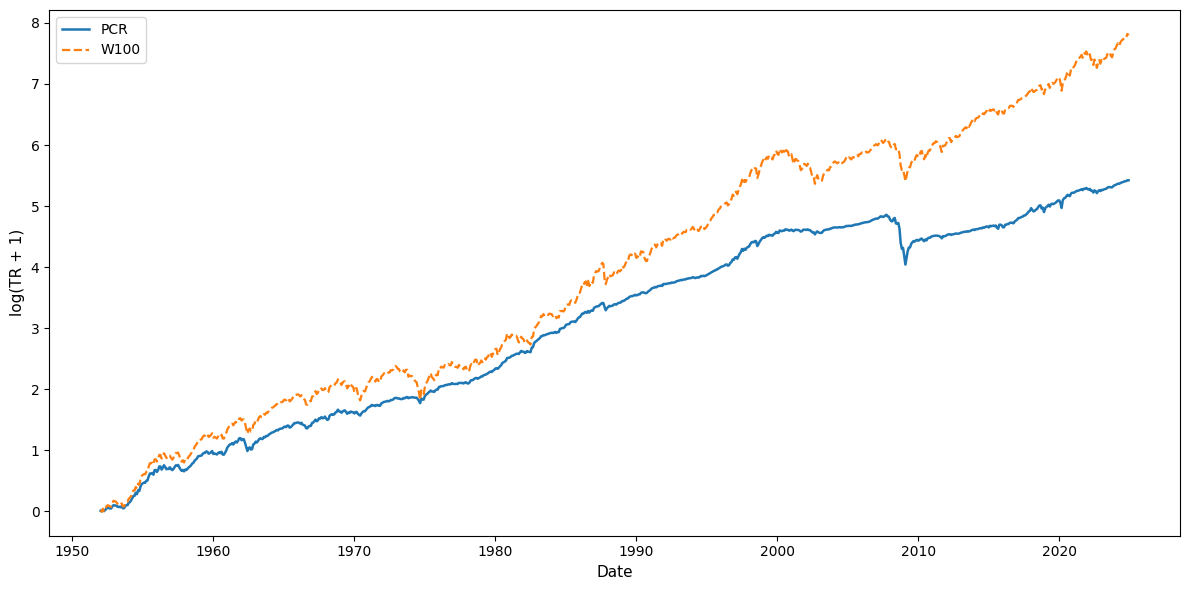

In [11]:
model_pred_cols = {
    "PCR": "y_pred_pcr_without_lookahead_ar_1950",
}

plot_ts.plot_regression_timing_total_return_models(
    df,
    model_pred_cols=model_pred_cols,
    target_col="equity_premium",
    rf_col="Rfree",
    uselog=uselog,
    gamma=5.0,
    vol_window=60,
    baselines=["100"],   # choose any subset
    lag =0,
    log_scale = True,
    ylab= "log(TR + 1)" 
)


In [12]:
#loop over all columns containing "y_pred" and backtest each strategy
for col in df.columns:
    if ("2018" in col) and ("y_pred" in col):
        print(f"Backtesting strategy for {col}")
        bt = tsh.backtest_timing_strategy(df,pred_col = col, gamma=5.0, vol_window=60, uselog= uselog, lag = 1)
        summary = tsh.compare_strategies(bt, gamma=5.0)
        print(summary)
        
        print("\n")

Backtesting strategy for y_pred_pcr_without_lookahead_ar_2018
Timing spread (mean excess in vs out of market): nan (share in market: 100.00%, n=83)
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                                     
Model        0.500684  0.060444  0.079559  0.494305    -0.109569  0.046195   
HA           0.751248  0.084383  0.150845  0.465790    -0.209900  0.036039   
W50          0.707645  0.080438  0.085610  0.686593    -0.119424  0.062961   
W100         1.367908  0.132726  0.170968  0.686593    -0.236705  0.066880   

          Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                   
Model     0.010155  -0.016766   -0.020685  
HA             NaN        NaN         NaN  
W50            NaN        NaN         NaN  
W100           NaN        NaN         NaN  


Backtesting strategy for y_pred_combination_without_2018
Timing spread (mean excess in vs out of market): -0.0384 (sh

Timing spread (mean excess in vs out of market): nan (share in market: 100.00%, n=720)
Timing spread (mean excess in vs out of market): -0.1234 (share in market: 99.86%, n=720)
Timing spread (mean excess in vs out of market): 0.0091 (share in market: 77.78%, n=720)
Timing spread (mean excess in vs out of market): 0.0015 (share in market: 76.11%, n=720)


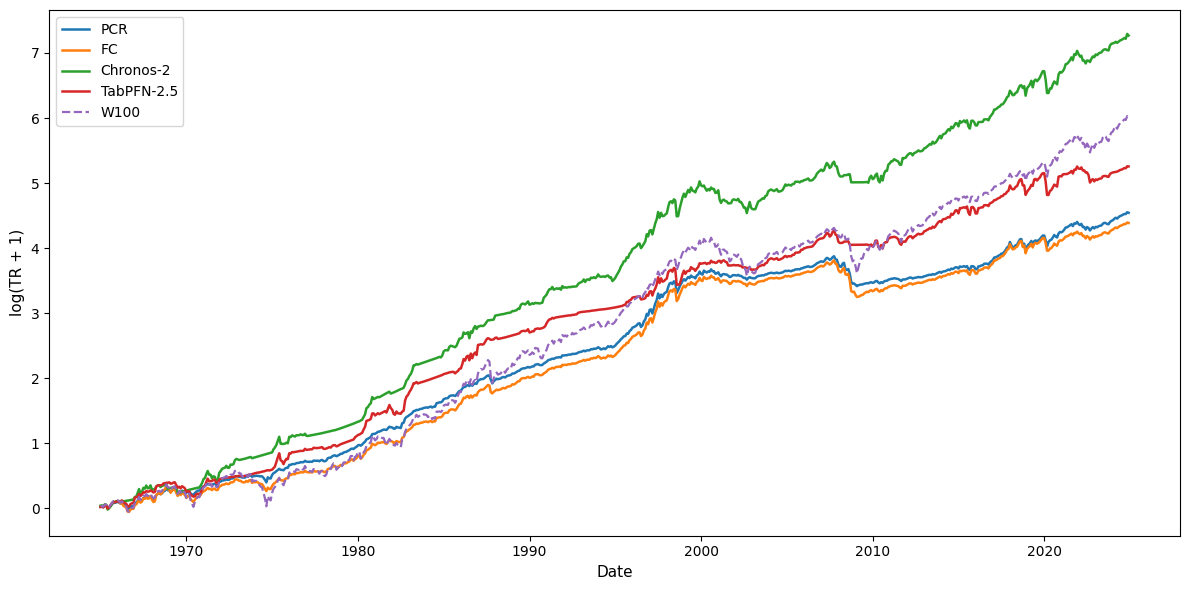

In [13]:
model_pred_cols = {
    "PCR": "y_pred_pcr_without_lookahead_ar",
    "FC": "y_pred_combination_completed",
    "Chronos-2": "y_pred_chronos2_without_lookahead",
    "TabPFN-2.5": "y_pred_tabpfn_without_lookahead_ar",
}

plot_ts.plot_regression_timing_total_return_models(
    df,
    model_pred_cols=model_pred_cols,
    target_col="equity_premium",
    rf_col="Rfree",
    uselog=uselog,
    gamma=5.0,
    vol_window=60,
    baselines=["100"],   # choose any subset
    lag =0,
    log_scale = True,
    ylab= "log(TR + 1)" 
)


In [14]:
for i in model_pred_cols.keys():
    col = model_pred_cols[i]
    print(f"Backtesting strategy for {col}")
    bt = tsh.backtest_timing_strategy(df,pred_col = col, gamma=5.0, vol_window=60, uselog= uselog, lag = 0)
    summary = tsh.compare_strategies(bt, gamma=5.0)
    print(summary)
    
    print("\n")

Backtesting strategy for y_pred_pcr_without_lookahead_ar
Timing spread (mean excess in vs out of market): nan (share in market: 100.00%, n=720)
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                                     
Model       93.035257  0.078669  0.083965  0.425358    -0.368325  0.061896   
HA         122.616045  0.083597  0.135434  0.339374    -0.596701  0.044090   
W50         88.105142  0.077701  0.075431  0.450079    -0.278997  0.063685   
W100       404.373810  0.105260  0.150742  0.450079    -0.502159  0.055124   

          Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                   
Model     0.017806  -0.001788    0.006772  
HA             NaN        NaN         NaN  
W50            NaN        NaN         NaN  
W100           NaN        NaN         NaN  


Backtesting strategy for y_pred_combination_completed
Timing spread (mean excess in vs out of market): -0.1234 (share in 